<a href="https://colab.research.google.com/github/Rushabhbhagat08/NYC-Taxi-Time-Prediction-/blob/main/NYC_Taxi_Trip_Time_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - NYC Taxi Trip Time Prediction 



##### **Project Type**    - EDA/Regression
##### **Contribution**    - Individual
##### **Team Member**: Rushabh Anilrao Bhagat

# **Project Summary -**

New York City taxi rides form the core of the traffic in the city of New York. The many rides taken every day by New Yorkers in the busy city can give us a great idea of traffic times, road blockages, and so on. Predicting the duration of a taxi trip is very important since a user would always like to know precisely how much time it would require of him to travel from one place to another. Given the rising popularity of app-based taxi usage through common vendors like Ola and Uber, competitive pricing has to be offered to ensure users choose them. Prediction of duration and price of trips can help users to plan their trips properly, thus keeping potential margins for traffic congestions. It can also help drivers to determine the correct route which in-turn will take lesser time as accordingly. Moreover, the transparency about pricing and trip duration will help to attract users at times when popular taxi app-based vendor services apply surge fares. Thus in this research study, we used real-time data which customers would provide at the start of a ride, or while booking a ride to predict the duration and fare. This data includes pickup and drop-off point coordinates, the distance of the trip, start time, number of passengers, and a rate code belonging to the different classes of cabs available such that the rate applied is based on a regular or airport basis. Hereafter, we applied multiple algorithm Perceptron models to find out which one of them provides better accuracy and relationships between real-time variables. At last, a comparison of the two mentioned algorithms facilitates us to decide that Random Forest is more fitter and efficient than Decision Tree Perceptron for taxi trip duration-based predictions.

# **GitHub Link -**

https://github.com/Rushabhbhagat08/NYC-Taxi-Time-Prediction-.git

# **Problem Statement**


Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

# ***Let's Begin !***

###**Install Requird Libraries**

In [6]:
!pip install haversine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## ***1. Know Your Data***

### Import Libraries

In [7]:
# Import Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
# plt.style.use("dark_background")
# from sklearn.model_selection import GridSearchCV
# from pandas_profiling import ProfileReport
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
# from xgboost import XGBRegressor
# from sklearn import metrics
# from sklearn.model_selection import train_test_split, GridSearchCV
from haversine import haversine
# import statsmodels.formula.api as sm
# from sklearn.model_selection import learning_curve
# from sklearn.model_selection import ShuffleSplit
import warnings; warnings.simplefilter('ignore')

### Dataset Loading

In [8]:
#Load Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# Load Dataset
Taxi_Time_df=pd.read_csv('/content/drive/MyDrive/Regression_project/NYC taxi Time Prediction /Copy of NYC Taxi Data.csv')

### Dataset First View

In [11]:
# Dataset First Look
Taxi_Time_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [12]:
#dataset last 5 records
Taxi_Time_df.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


### Dataset Rows & Columns count

In [13]:
# Dataset Rows & Columns count
rows= Taxi_Time_df.shape[0]
columns = Taxi_Time_df.shape[1]
print(f"The number of rows is {rows} and number of columns is {columns}.")

The number of rows is 1458644 and number of columns is 11.


### Dataset Information

In [14]:
# Dataset Info
Taxi_Time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


#### Duplicate Values

In [15]:
# Dataset Duplicate Value Count
Taxi_Time_df['vendor_id'].value_counts()

2    780302
1    678342
Name: vendor_id, dtype: int64

#### Missing Values/Null Values

In [16]:
# Missing Values/Null Values Count
Taxi_Time_df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

There is no NaN/NULL record in the dataset, So we dont have to impute any record.

### What did you know about your dataset?

* The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.
NYC Taxi Data.csv - the training set (contains 1458644 trip records)

## ***2. Understanding Your Variables***

In [17]:
# Dataset Columns
Taxi_Time_df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [18]:
# Dataset Describe
Taxi_Time_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


### Variables Description 

1. id - a unique identifier for each trip.

2. vendor_id - a code indicating the provider associated with the trip record.

3. pickup_datetime - date and time when the meter was engaged.

4. dropoff_datetime - date and time when the meter was disengaged.

5. passenger_count - the number of passengers in the vehicle (driver entered value).

6. pickup_longitude - the longitude where the meter was engaged.

7. pickup_latitude - the latitude where the meter was engaged.

8. dropoff_longitude - the longitude where the meter was disengaged.

9. dropoff_latitude - the latitude where the meter was disengaged.

10. store_and_fwd_flag - This flag indicates whether the trip record was held     in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip.
11. trip_duration - duration of the trip in seconds.


### Check Unique Values for each variable.

In [19]:
# Check Unique Values for each variable.
print("There are %d unique id's in Training dataset, which is equal to the number of records"%(Taxi_Time_df.id.nunique()))

There are 1458644 unique id's in Training dataset, which is equal to the number of records


## 3. ***Data Wrangling***

### Data Wrangling Code

In [20]:
#Calculate and assign new columns to the dataframe such as weekday,
#month and pickup_hour which will help us to gain more insights from the data.

Taxi_Time_df['pickup_datetime'] = pd.to_datetime(Taxi_Time_df['pickup_datetime'])
Taxi_Time_df['dropoff_datetime'] = pd.to_datetime(Taxi_Time_df['dropoff_datetime'])
Taxi_Time_df['pickup_day'] = Taxi_Time_df['pickup_datetime'].dt.day
Taxi_Time_df['pickup_month'] = Taxi_Time_df['pickup_datetime'].dt.month
Taxi_Time_df['pickup_date'] = Taxi_Time_df['pickup_datetime'].dt.date
Taxi_Time_df['pickup_hour'] = Taxi_Time_df['pickup_datetime'].dt.hour
Taxi_Time_df['pickup_min'] = Taxi_Time_df['pickup_datetime'].dt.minute
Taxi_Time_df['dropoff_min'] = Taxi_Time_df['dropoff_datetime'].dt.minute
Taxi_Time_df['pickup_weekday'] = Taxi_Time_df['pickup_datetime'].dt.weekday 


In [21]:
Taxi_Time_df['store_and_fwd_flag']=Taxi_Time_df['store_and_fwd_flag'].apply(lambda x : 0 if x=='N' else 1)

In [22]:
#updated dataset
Taxi_Time_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,pickup_month,pickup_date,pickup_hour,pickup_min,dropoff_min,pickup_weekday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,14,3,2016-03-14,17,24,32,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,12,6,2016-06-12,0,43,54,6
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,19,1,2016-01-19,11,35,10,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429,6,4,2016-04-06,19,32,39,2
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435,26,3,2016-03-26,13,30,38,5


In [23]:
#calc_distance is a function to calculate distance between pickup and dropoff coordinates using Haversine formula.
def calc_distance(df):
    pickup = (df['pickup_latitude'], df['pickup_longitude'])
    drop = (df['dropoff_latitude'], df['dropoff_longitude'])
    return haversine(pickup, drop)

In [24]:
#Calculate distance and assign new column to the dataframe.
Taxi_Time_df['distance'] = Taxi_Time_df.apply(lambda x: calc_distance(x), axis = 1)
# Taxi_Time_df['distance']

In [25]:
#Calculate Speed in km/h for further insights
Taxi_Time_df['speed'] = (Taxi_Time_df.distance/(Taxi_Time_df.trip_duration/3600))

In [26]:
#Check the type of each variable
Taxi_Time_df.dtypes.reset_index()

,index,0
0,id,object
1,vendor_id,int64
2,pickup_datetime,datetime64[ns]
3,dropoff_datetime,datetime64[ns]
4,passenger_count,int64
5,pickup_longitude,float64
6,pickup_latitude,float64
7,dropoff_longitude,float64
8,dropoff_latitude,float64
9,store_and_fwd_flag,int64


In [27]:
#Dummify all the categorical features like "store_and_fwd_flag, vendor_id, month, weekday_num, pickup_hour, passenger_count" except the label i.e. "trip_duration"

dummy = pd.get_dummies(Taxi_Time_df.store_and_fwd_flag, prefix='flag')
dummy.drop(dummy.columns[0], axis=1, inplace=True) #avoid dummy trap
data = pd.concat([Taxi_Time_df,dummy], axis = 1)

dummy = pd.get_dummies(Taxi_Time_df.vendor_id, prefix='vendor_id')
dummy.drop(dummy.columns[0], axis=1, inplace=True) #avoid dummy trap
data = pd.concat([Taxi_Time_df,dummy], axis = 1)

dummy = pd.get_dummies(Taxi_Time_df.pickup_month, prefix='pickup_month')
dummy.drop(dummy.columns[0], axis=1, inplace=True) #avoid dummy trap
data = pd.concat([Taxi_Time_df,dummy], axis = 1)

dummy = pd.get_dummies(Taxi_Time_df.pickup_weekday, prefix='pickup_weekday')
dummy.drop(dummy.columns[0], axis=1, inplace=True) #avoid dummy trap
data = pd.concat([Taxi_Time_df,dummy], axis = 1)

dummy = pd.get_dummies(Taxi_Time_df.pickup_hour, prefix='pickup_hour')
dummy.drop(dummy.columns[0], axis=1, inplace=True) #avoid dummy trap
data = pd.concat([Taxi_Time_df,dummy], axis = 1)

dummy = pd.get_dummies(Taxi_Time_df.passenger_count, prefix='passenger_count')
dummy.drop(dummy.columns[0], axis=1, inplace=True) #avoid dummy trap
data = pd.concat([Taxi_Time_df,dummy], axis = 1)

In [28]:
#update a dataset
Taxi_Time_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,pickup_month,pickup_date,pickup_hour,pickup_min,dropoff_min,pickup_weekday,distance,speed
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,14,3,2016-03-14,17,24,32,0,1.498523,11.856445
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,12,6,2016-06-12,0,43,54,6,1.805510,9.803672
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,19,1,2016-01-19,11,35,10,1,6.385107,10.822216
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429,6,4,2016-04-06,19,32,39,2,1.485500,12.465738
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435,26,3,2016-03-26,13,30,38,5,1.188590,9.836608


* Now our dataset is complete for the further analysis before we train our model with optimal variables

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

# 1. <u>**`Univariate Analysis`**</u>

---



---



##**1. <u>Passengers</u>**

### What all manipulations have you done and insights you found?

New York City Taxi Passenger Limit says:

* A maximum of 4 passengers can ride in traditional cabs, there are also 5 passenger cabs that look more like minivans.

* A child under 7 is allowed to sit on a passenger's lap in the rear seat in addition to the passenger limit.
So, in total we can assume that maximum 6 passenger can board the new york taxi i.e. 5 adult + 1 minor

In [29]:
pd.options.display.float_format = '{:.2f}'.format #To suppres scientific notation.
Taxi_Time_df.passenger_count.value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

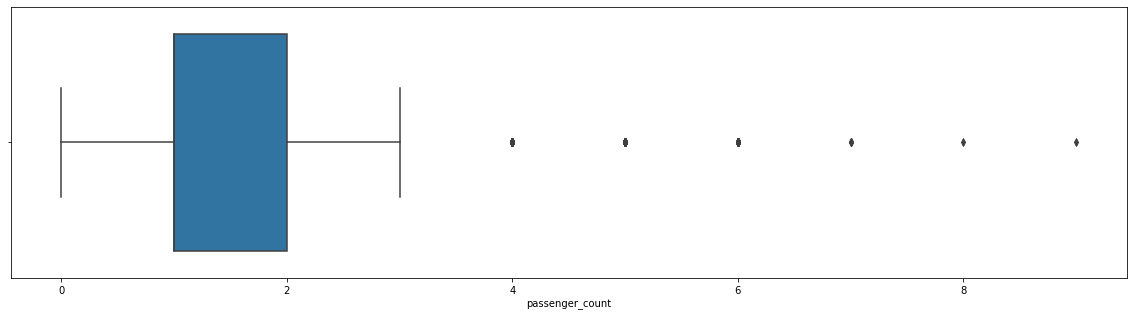

In [30]:
plt.figure(figsize = (20,5))
sns.boxplot(data.passenger_count)
plt.show()

##### 1. Why did you pick the specific chart?

* Beacues, There are some trips with 0 passenger count.
Few trips consisted of even 7, 8 or 9 passengers. so,
Clear outliers and pointers to data inconsistency
Most of trip consist of passenger either 1 or 2. thats reason we use boxplot here.


2. What is/are the insight(s) found from the chart?

* Passenger count is a driver entered value. Since the trip is not possible without passengers. It is evident that the driver forgot to enter the value for the trips with 0 passenger count. Lets analyze the passenger count distribution further to make it consistent for further analysis

In [31]:
data.passenger_count.describe()

count   1458644.00
mean          1.66
std           1.31
min           0.00
25%           1.00
50%           1.00
75%           2.00
max           9.00
Name: passenger_count, dtype: float64

* As per above details. Mean median and mode are all approx equal to 1. So we would replace the 0 passenger count with 1.

In [32]:
data['passenger_count']=data.passenger_count.map(lambda x:1 if x==0 else x)

* Also, we will remove the records with passenger count > 7, 8 or 9 as they are extreme values and looks very odd to be ocupied in a taxi.

In [33]:
data=data[data.passenger_count<=6]

* Now, the data is consistent with respect to the passenger count. Let's take a look at the ditribution with a graph below

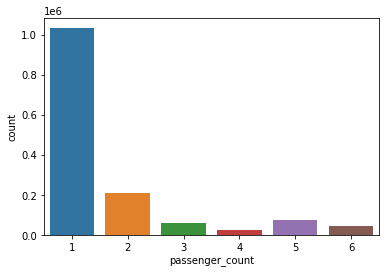

In [34]:
sns.countplot(data.passenger_count)
plt.show()

* now, you observe the graph It is evident that most of the trips was taken by single passenger.

##**2. <u>Vendor</u>**

* Here, we analyze taxi data only for the 2 vendors which are listed as 1 and 2 in the datset.

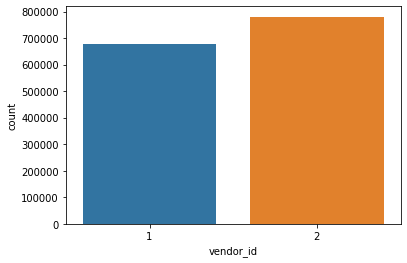

In [35]:
sns.countplot(data.vendor_id)
plt.show()

* Though both the vendors seems to have almost equal market share. But Vendor 2 is evidently more famous among the population as per the above graph.

##**3. <u>Distance</u>**

* Let's now have a look on the distribution of the distance across the different types of rides.

In [36]:
#describe distance data
data.distance.describe()

count   1458639.00
mean          3.44
std           4.30
min           0.00
25%           1.23
50%           2.09
75%           3.88
max        1240.91
Name: distance, dtype: float64

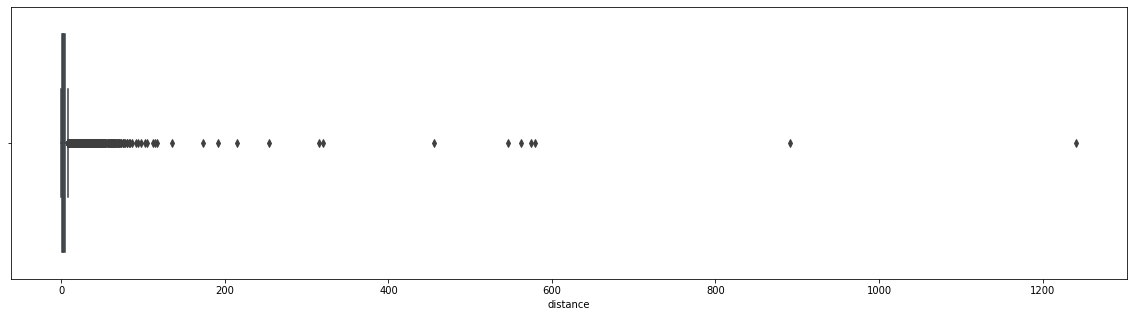

In [37]:
# distance boxplot
plt.figure(figsize=(20,5))
sns.boxplot(data.distance)
plt.show()

##### 1. What is/are the insight(s) found from the chart?

* There some trips with over 100 km distance. And 
some of the trips distance value is 0 km.

* So, the mean distance travelled is approx 3.5 kms.
standard deviation of 4.3 which shows that most of the trips are limited to the range of 1-10 kms.

In [38]:
print("There are {} trip records with 0 km distance".format(data.distance[data.distance == 0 ].count()))

There are 5895 trip records with 0 km distance


In [39]:
data[data.distance == 0 ].head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,speed,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,passenger_count_7,passenger_count_8,passenger_count_9
246,id3487442,2,2016-02-29 18:39:12,2016-02-29 18:42:59,1,-73.98,40.77,-73.98,40.77,0,...,0.00,1,0,0,0,0,0,0,0,0
291,id0924324,2,2016-05-10 18:07:52,2016-05-10 18:26:21,2,-73.96,40.78,-73.96,40.78,0,...,0.00,0,1,0,0,0,0,0,0,0
407,id1145809,2,2016-05-16 23:15:13,2016-05-16 23:31:00,6,-73.81,40.69,-73.81,40.69,0,...,0.00,0,0,0,0,0,1,0,0,0
702,id3499387,1,2016-01-25 19:45:12,2016-01-25 19:54:52,1,-73.79,40.65,-73.79,40.65,0,...,0.00,1,0,0,0,0,0,0,0,0
1620,id0753277,1,2016-01-27 22:29:31,2016-01-27 22:29:58,1,-74.21,40.82,-74.21,40.82,0,...,0.00,1,0,0,0,0,0,0,0,0


Around 6K trip record with distance equal to 0. Below are some possible explanation for such records.
1. Customer changed mind and cancelled the journey just after accepting it.
2. Software didn't recorded dropoff location properly due to which dropoff location is the same as the pickup location.
3. Issue with GPS tracker while the journey is being finished.
4. Driver cancelled the trip just after accepting it due to some reason. So the trip couldn't start
Or some other issue with the software itself which a technical guy can explain
There is some serious inconsistencies in the data where drop off location is same as the pickup location. 

* We can't think off imputing the distance values considering a correlation with the duration because the dropoff_location coordinates would not be inline with the distance otherwise.

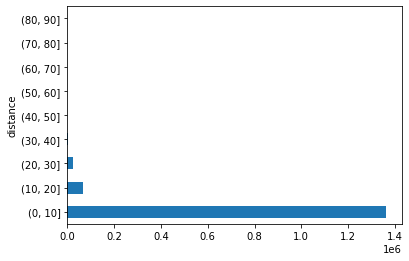

In [40]:
#Distance barplot
data.distance.groupby(pd.cut(data.distance, np.arange(0,100,10))).count().plot(kind='barh')
plt.show()

* From the above observation it is evident that most of the rides are completed between 1-10 Kms with some of the rides with distances between 10-30 kms. Other slabs bar are not visible because the number of trips are very less as compared to these slabs

##**4. <u>Trip duration</u>**

In [41]:
# trip duration describe
data.trip_duration.describe()

count   1458639.00
mean        959.50
std        5237.44
min           1.00
25%         397.00
50%         662.00
75%        1075.00
max     3526282.00
Name: trip_duration, dtype: float64

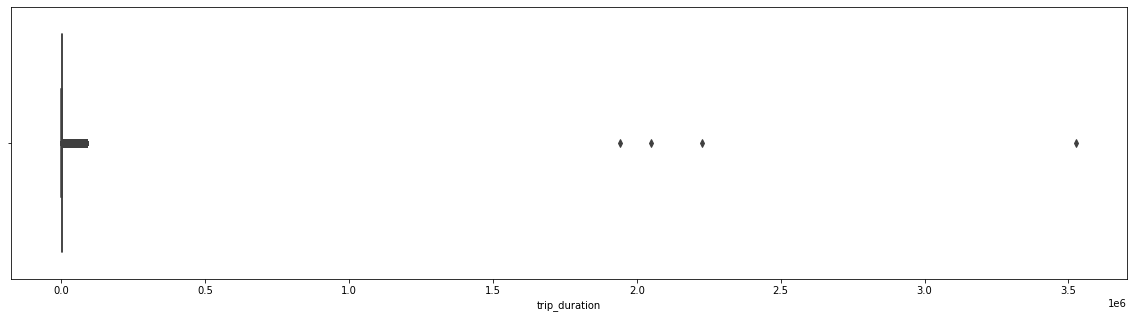

In [42]:
# plot the Trip duration boxplot
plt.figure(figsize = (20,5))
sns.boxplot(data.trip_duration)
plt.show()

##### 1. Why did you pick the specific chart?

* Some trip durations are over 100000 seconds which are clear outliers and should be removed. so we use boxplot here.

###1. What is/are the insight(s) found from the chart?
* There are some durations with as low as 1 second. which points towards trips with 0 km distance.
Major trip durations took between 10-20 mins to complete.
Mean and mode are not same which shows that trip duration distribution is skewed towards right.

In [43]:
data.trip_duration.groupby(pd.cut(data.trip_duration, np.arange(1,max(data.trip_duration),3600))).count()

trip_duration
(1, 3601]             1446308
(3601, 7201]            10045
(7201, 10801]             141
(10801, 14401]             35
(14401, 18001]              5
                       ...   
(3506401, 3510001]          0
(3510001, 3513601]          0
(3513601, 3517201]          0
(3517201, 3520801]          0
(3520801, 3524401]          0
Name: trip_duration, Length: 979, dtype: int64

* There are some trips with more than 24 hours of travel duration i.e. 86400 seconds. Which might have occured on weekends for the outstation travels.
Major chunk of trips are completed within an interval of 1 hour with some good numbers of trips duration going above 1 hour.
Let's look at those trips with huge duration, these are outliers and should be removed for the data consistency.

In [44]:
data[data.trip_duration > 86400]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,speed,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,passenger_count_7,passenger_count_8,passenger_count_9
355003,id1864733,1,2016-01-05 00:19:42,2016-01-27 11:08:38,1,-73.79,40.64,-73.96,40.77,0,...,0.04,1,0,0,0,0,0,0,0,0
680594,id0369307,1,2016-02-13 22:38:00,2016-03-08 15:57:38,2,-73.92,40.74,-73.98,40.76,0,...,0.01,0,1,0,0,0,0,0,0,0
924150,id1325766,1,2016-01-05 06:14:15,2016-01-31 01:01:07,1,-73.98,40.74,-73.99,40.73,0,...,0.00,1,0,0,0,0,0,0,0,0
978383,id0053347,1,2016-02-13 22:46:52,2016-03-25 18:18:14,1,-73.78,40.65,-73.98,40.75,0,...,0.02,1,0,0,0,0,0,0,0,0


* These trips run for more than 20 days, which seems unlikely by the distance travelled.
All the trips are taken by vendor 1 which points us to the fact that this vendor might allows much longer trip for outstations.
All these trips are either taken on Tuesday's in 1st month or Saturday's in 2nd month. There might be some relation with the weekday, pickup location, month and the passenger.
But they fail our purpose of correct prediction and bring inconsistencies in the algorithm calculation.

In [45]:
data[data.trip_duration <= 86400]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,speed,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,passenger_count_7,passenger_count_8,passenger_count_9
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.98,40.77,-73.96,40.77,0,...,11.86,1,0,0,0,0,0,0,0,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.98,40.74,-74.00,40.73,0,...,9.80,1,0,0,0,0,0,0,0,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.98,40.76,-74.01,40.71,0,...,10.82,1,0,0,0,0,0,0,0,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.01,40.72,-74.01,40.71,0,...,12.47,1,0,0,0,0,0,0,0,0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.97,40.79,-73.97,40.78,0,...,9.84,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.98,40.75,-73.99,40.74,0,...,5.67,0,0,0,1,0,0,0,0,0
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.00,40.75,-73.97,40.80,0,...,33.25,1,0,0,0,0,0,0,0,0
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.96,40.77,-74.00,40.71,0,...,36.87,1,0,0,0,0,0,0,0,0
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.98,40.75,-73.97,40.76,0,...,10.54,1,0,0,0,0,0,0,0,0


* Let's visualize the number of trips taken in slabs of 0-10, 20-30 ... minutes respectively

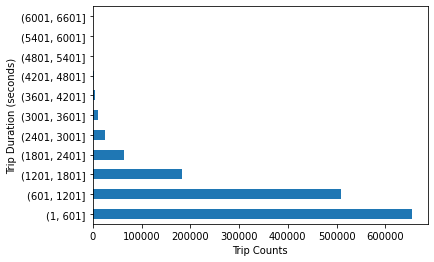

In [46]:
# trip count graph 
data.trip_duration.groupby(pd.cut(data.trip_duration, np.arange(1,7200,600))).count().plot(kind='barh')
plt.xlabel('Trip Counts')
plt.ylabel('Trip Duration (seconds)')
plt.show()

* We can observe that most of the trips took 0 - 30 mins to complete i.e. approx 1800 secs. Let's move ahead to next feature.

##**5. <u>Speed of a car</u>**

* Speed is a function of distance and time. Let's visualize speed in different trips.

* Maximum speed limit in NYC is as follows:

* 25 mph in urban area i.e. 40 km/h.
* 65 mph on controlled state highways i.e. approx 104 km/h

In [47]:
# describe speed
data.speed.describe()

count   1458639.00
mean         14.42
std          14.98
min           0.00
25%           9.12
50%          12.79
75%          17.84
max        9274.85
Name: speed, dtype: float64

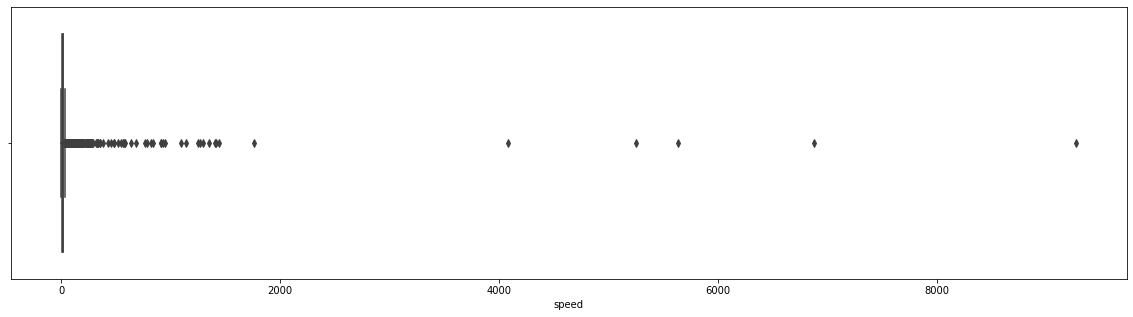

In [48]:
# speed boxplot
plt.figure(figsize = (20,5))
sns.boxplot(data.speed)
plt.show()

###1. What is/are the insight(s) found from the chart?

* Many trips were done at a speed of over 200 km/h. Going SuperSonic..!!
Let's remove them and focus on the trips which were done at less than 104 km/h as per the speed limits

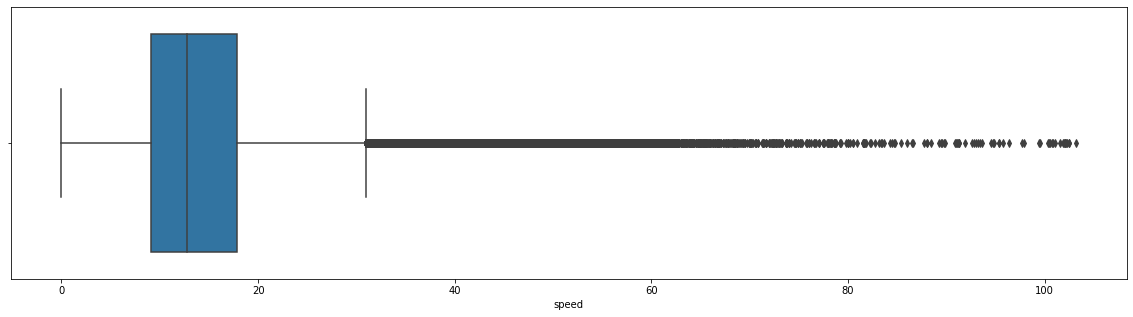

In [49]:
#speed boxplot 
data = data[data.speed <= 104]
plt.figure(figsize = (20,5))
sns.boxplot(data.speed)
plt.show()

* Trips over 30 km/h are being considered as outliers but we cannot ignore them because they are well under the highest speed limit of 104 km/h on state controlled highways.
Mostly trips are done at a speed range of 10-20 km/h with an average speed of around 14 km/h.
Let's take a look at the speed range ditribution with the help of graph.

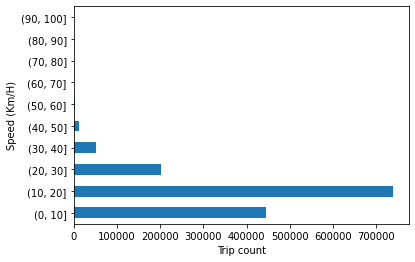

In [50]:
# barplot trip count
data.speed.groupby(pd.cut(data.speed, np.arange(0,104,10))).count().plot(kind = 'barh')
plt.xlabel('Trip count')
plt.ylabel('Speed (Km/H)')
plt.show()

* It is evident from this graph what we thought off earlier i.e. most of the trips were done at a speed range of 10-20 km/H.

##**6. <u>Store_and_fwd_flag</u>**

* This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip.

In [51]:
# count the store_and _fwd_flag data
x=Taxi_Time_df['store_and_fwd_flag'].value_counts()
print(x)

0    1450599
1       8045
Name: store_and_fwd_flag, dtype: int64


Text(0.5, 1.0, 'Store and Forward Flag')

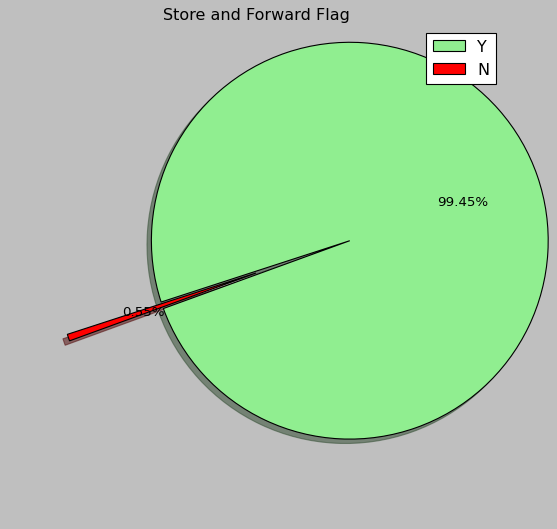

In [52]:
# pie plot for given data
plt.style.use("classic")
plt.figure(figsize=(8,8))
plt.pie(x, colors=['lightgreen', 'red'], shadow=True, explode=[0.5,0], autopct='%1.2f%%', startangle=200)
plt.legend(labels=['Y','N'])
plt.title("Store and Forward Flag")

* store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y = store and forward; N = not a store and forward trip.

* Visualization tells us that there were very few trips of which the records were stored in memory due to no connection to the server.

#2. **<U>`Bivariate Analysis`</u>**








## 1. **Total Trips**

* **Total trips Per Hour**

* Let's take a look at the distribution of the pickups across the 24 hour time scale.

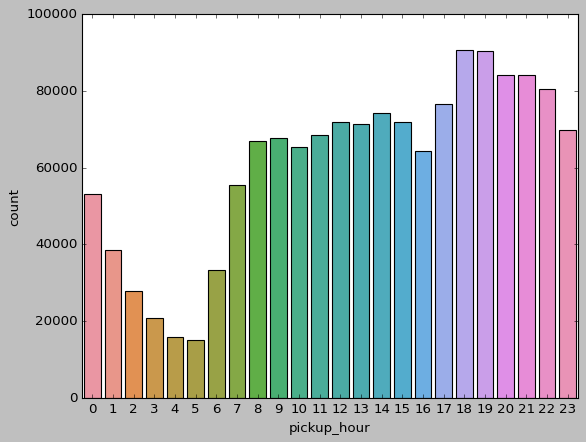

In [53]:
sns.countplot(data.pickup_hour)
plt.show()

* It's inline with the general trend of taxi pickups which starts increasing from 6AM in the morning and then declines from late evening i.e. around 8 PM. There is no unusual behavior here.

* **Total trips per weekday**

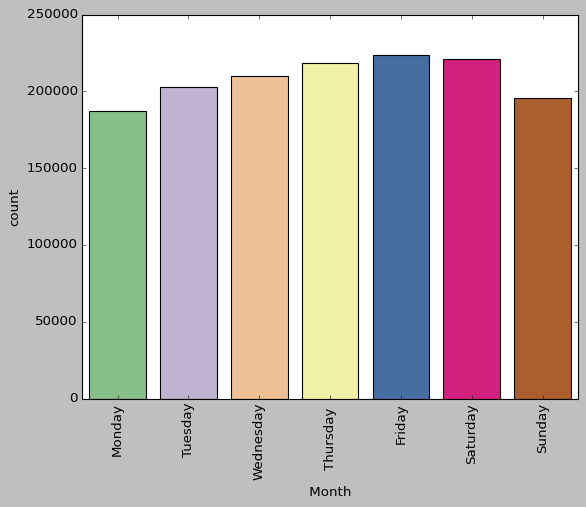

In [54]:
# changes in graph monday to friday
plt.figure(figsize = (8,6))
sns.countplot(data.pickup_weekday,palette='Accent')
plt.xlabel(' Month ')
# plt.ylabel('Pickup counts')
plt.xticks([0,1,2,3,4,5,6], labels=['Monday','Tuesday','Wednesday','Thursday ','Friday','Saturday','Sunday'], rotation=90)
plt.show()


* Here we can see an increasing trend of taxi pickups starting from Monday till Friday. The trend starts declining from saturday till monday which is normal where some office going people likes to stay at home for rest on the weekends.

* **Total Trips Per Hours**

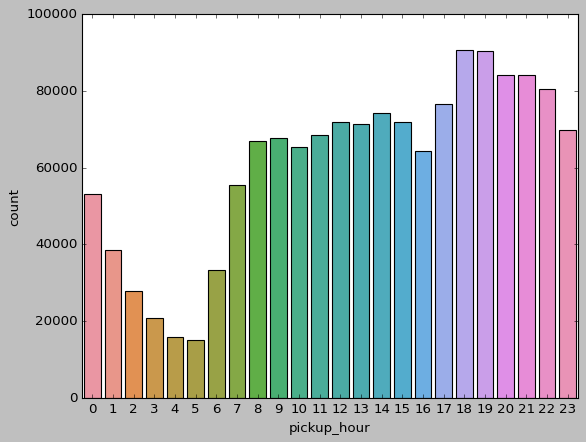

In [55]:
#changes in graph here
sns.countplot(data.pickup_hour)
plt.show()

* It's inline with the general trend of taxi pickups which starts increasing from 6AM in the morning and then declines from late evening i.e. around 8 PM. There is no unusual behavior here.

###1. Interesting find:


* Taxi pickups increased in the late night hours over the weekend possibly due to more outstation rides or for the late night leisures nearby activities.
Early morning pickups i.e before 5 AM have increased over the weekend in comparison to the office hours pickups i.e. after 7 AM which have decreased due to obvious reasons.
Taxi pickups seems to be consistent across the week at 15 Hours i.e. at 3 PM.

* **Total trips per month**

* Let's take a look at the trip distribution across the months to understand if there is any diffrence in the taxi pickups in different months

Text(0.5, 1.0, 'Overall Monthly trips')

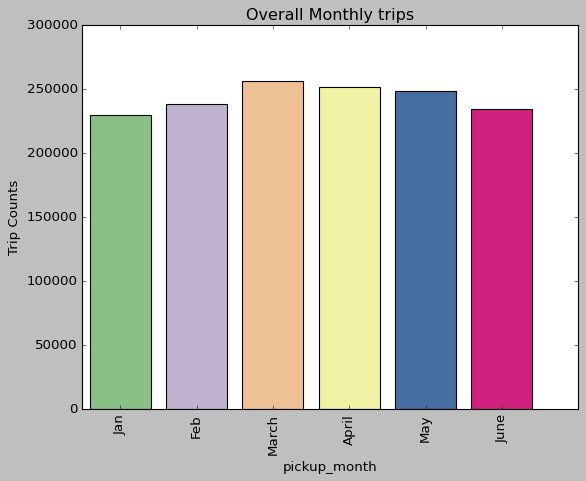

In [56]:
#changes in month here
sns.countplot(data.pickup_month,palette='Accent')
plt.ylabel('Trip Counts')
plt.xticks([0,1,2,3,4,5,6], labels=['Jan','Feb','March','April','May','June'], rotation=90)
plt.title('Overall Monthly trips')


##2. **Trip Duration**

* **Trip Duration Per Hours**

* We need to aggregate the total trip duration to plot it agaist the month. The aggregation measure can be anything like sum, mean, median or mode for the duration. Since we already did the outlier analysis, so we can take the mean to visualize the pattern which should not result in the bias of the general trend.

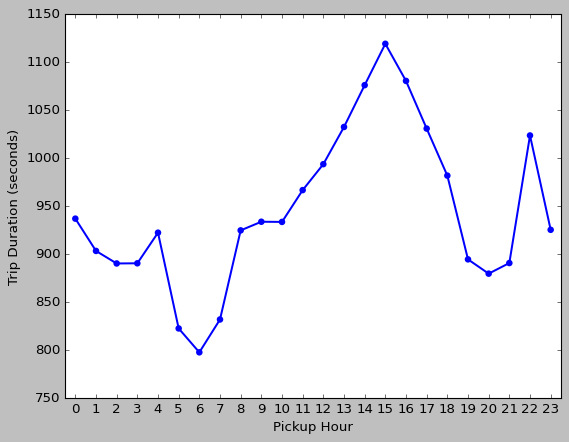

In [57]:
group1 = data.groupby('pickup_hour').trip_duration.mean()
sns.pointplot(group1.index, group1.values)
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Pickup Hour')
plt.show()



1. What is/are the insight(s) found from the chart?

* Average trip duration is lowest at 6 AM when there is minimal traffic on the roads.

* Average trip duration is generally highest around 3 PM during the busy streets.

* Trip duration on an average is similar during early morning hours i.e. before 6 AM & late evening hours i.e. after 6 PM.

* **Trip duration per weekday**

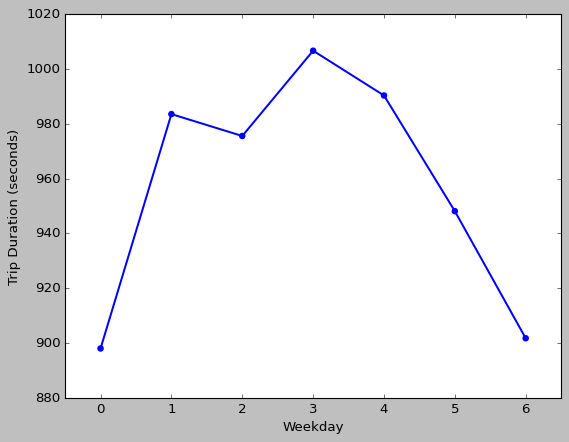

In [58]:
#Trip duration per weekday graph plot
group2 = data.groupby('pickup_weekday').trip_duration.mean()
sns.pointplot(group2.index, group2.values)
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Weekday')
plt.show()

We can see that trip duration is almost equally distributed across the week on a scale of 0-1000 minutes with minimal difference in the duration times. Also, it is observed that trip duration on thursday is longest among all days.

* **Trip duration per month**

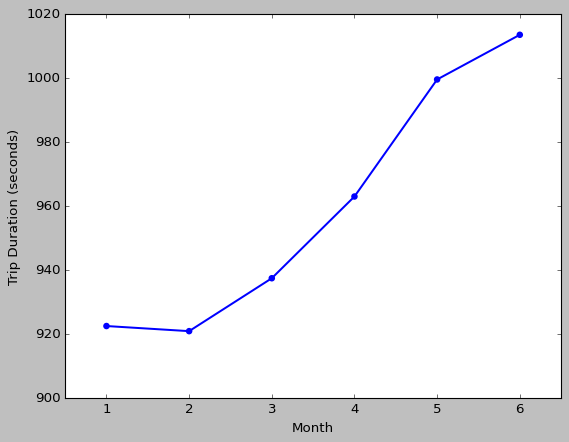

In [59]:
# Trip duration per month graph plot
group3 = data.groupby('pickup_month').trip_duration.mean()
sns.pointplot(group3.index, group3.values)
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Month')
plt.show()

* We can see an increasing trend in the average trip duration along with each subsequent month.

* The duration difference between each month is not much. It has increased gradually over a period of 6 months.

* It is lowest during february when winters starts declining.

* There might be some seasonal parameters like wind/rain which can be a factor of this gradual increase in trip duration over a period. Like May is generally the considered as the wettest month in NYC and which is inline with our visualization. As it generally takes longer on the roads due to traffic jams during rainy season. So natually the trip duration would increase towards April May and June.

* **Trip duration per vendor**

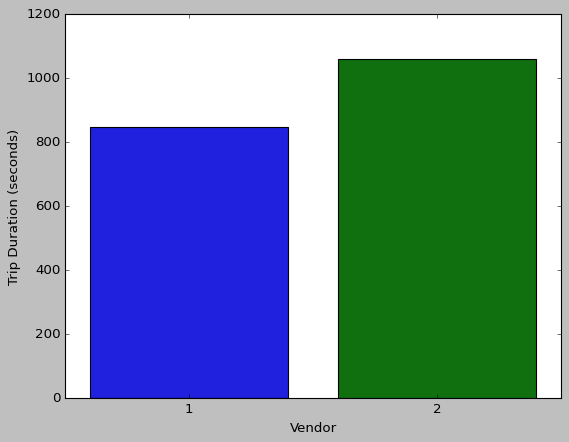

In [60]:
# Trip duration per vendor graph chart
group4 = data.groupby('vendor_id').trip_duration.mean()
sns.barplot(group4.index, group4.values)
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Vendor')
plt.show()

Vendor 2 takes the crown. Average trip duration for vendor 2 is higher than vendor 1 by approx 200 seconds i.e. atleast 3 minutes per trip.

##3. **Distance**

* **Distance per hour**

* Now, let us check how the distance is distributed against different variables. We know that trip distance must be more or less proportional to the trip duration if we ignore general traffic and other stuff on the road. Let's visualize this for each hour now.

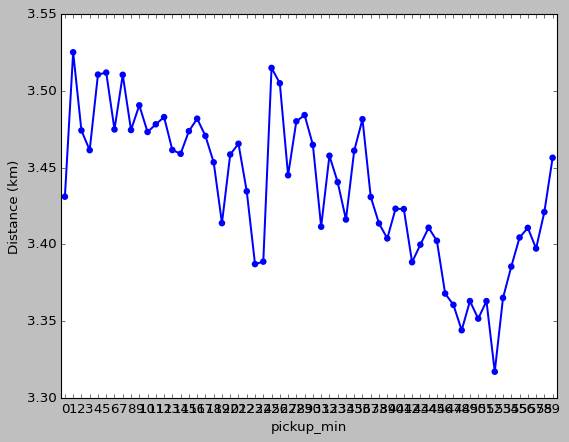

In [61]:
# Distance per hour graph chart
group5 = data.groupby('pickup_min').distance.mean()
sns.pointplot(group5.index, group5.values)
plt.ylabel('Distance (km)')
plt.show()

* Trip distance is highest during early morning hours which can account for some things like:

* Outstation trips taken during the weekends.

* Longer trips towards the city airport which is located in the outskirts of the city.

* Trip distance is fairly equal from morning till the evening varying around 3 - 3.5 kms.

* It starts increasing gradually towards the late night hours starting from evening till 5 AM and decrease steeply towards morning.

* **Distance per weekday**

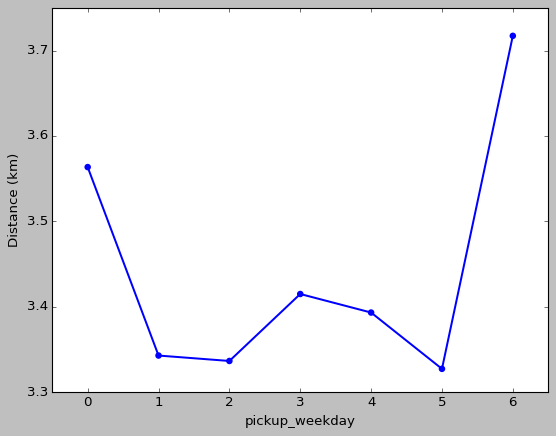

In [62]:
#Distance per weekday graph chart
group6 = data.groupby('pickup_weekday').distance.mean()
sns.pointplot(group6.index, group6.values)
plt.ylabel('Distance (km)')
plt.show()

So it's a fairly equal distribution with average distance metric verying around 3.5 km/h with Sunday being at the top may be due to outstation trips or night trips towards the airport.

* **Distance per month**

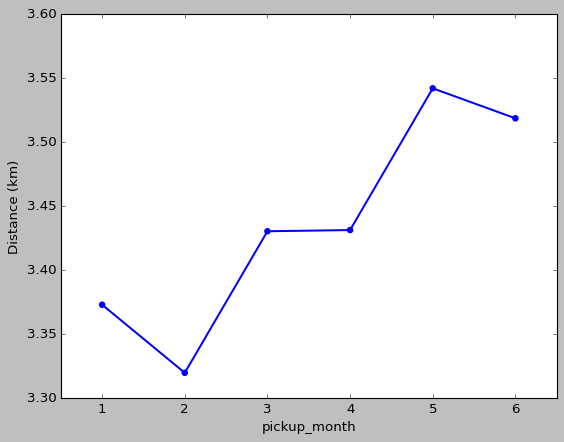

In [63]:
# Chart - 1 visualization code
group7 = data.groupby('pickup_month').distance.mean()
sns.pointplot(group7.index, group7.values)
plt.ylabel('Distance (km)')
plt.show()

Here also the distibution is almost equivalent, varying mostly around 3.5 km/h with 5th month being the highest in the average distance and 2nd month being the lowest.

* **Distance Per Vendor**

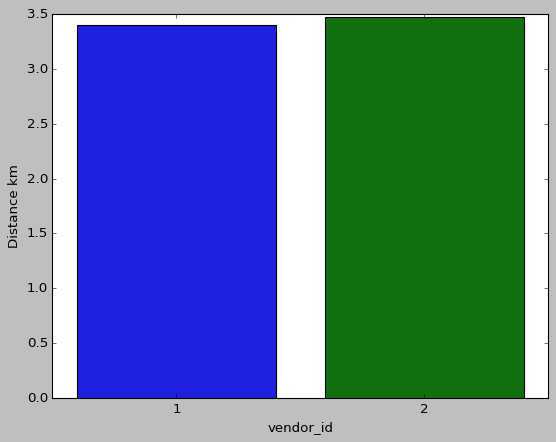

In [64]:
#Distance Per Vendor graph plot
group8 = data.groupby('vendor_id').distance.mean()
sns.barplot(group8.index, group8.values)
plt.ylabel("Distance km")
plt.show()

* This is more or less same picture with both the vendors. Nothing more to analyze in this.

##4. **Average**

* **Average speed per hour**

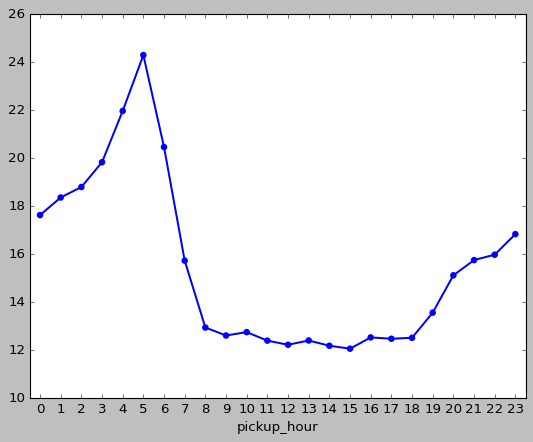

In [65]:
# Average per hour graph plot
group9 = data.groupby('pickup_hour').speed.mean()
sns.pointplot(group9.index, group9.values)
plt.show()

* The average trend is totally inline with the normal circumstances.

* Average speed tend to increase after late evening and continues to increase gradually till the late early morning hours.

* Average taxi speed is highest at 5 AM in the morning, then it declines steeply as the office hours approaches.

* Average taxi speed is more or less same during the office hours i.e. from 8 AM till 6PM in the evening.

* **Average speed Per Weekday**

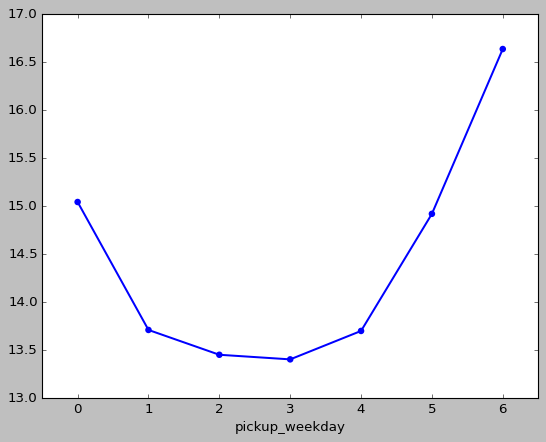

In [66]:
#Average speed Per Weekday graph plot
group10 = data.groupby('pickup_weekday').speed.mean()
sns.pointplot(group10.index, group10.values)
plt.show()

* Average taxi speed is higher on weekend as compared to the weekdays which is obvious when there is mostly rush of office goers and business owners.

* Even on monday the average taxi speed is shown higher which is quite surprising when it is one of the most busiest day after the weekend. There can be several possibility for such behaviour
Lot of customers who come back from outstation in early hours of Monday before 6 AM to attend office on time.

* Early morning hours customers who come from the airports after vacation to attend office/business on time for the coming week.

* There could be some more reasons as well which only a local must be aware of.
We also can't deny the anomalies in the dataset. which is quite cumbersome to spot in such a large dataset.

#### Chart - 14 - Correlation Heatmap

Text(0.5, 1.0, 'Correlation Plot')

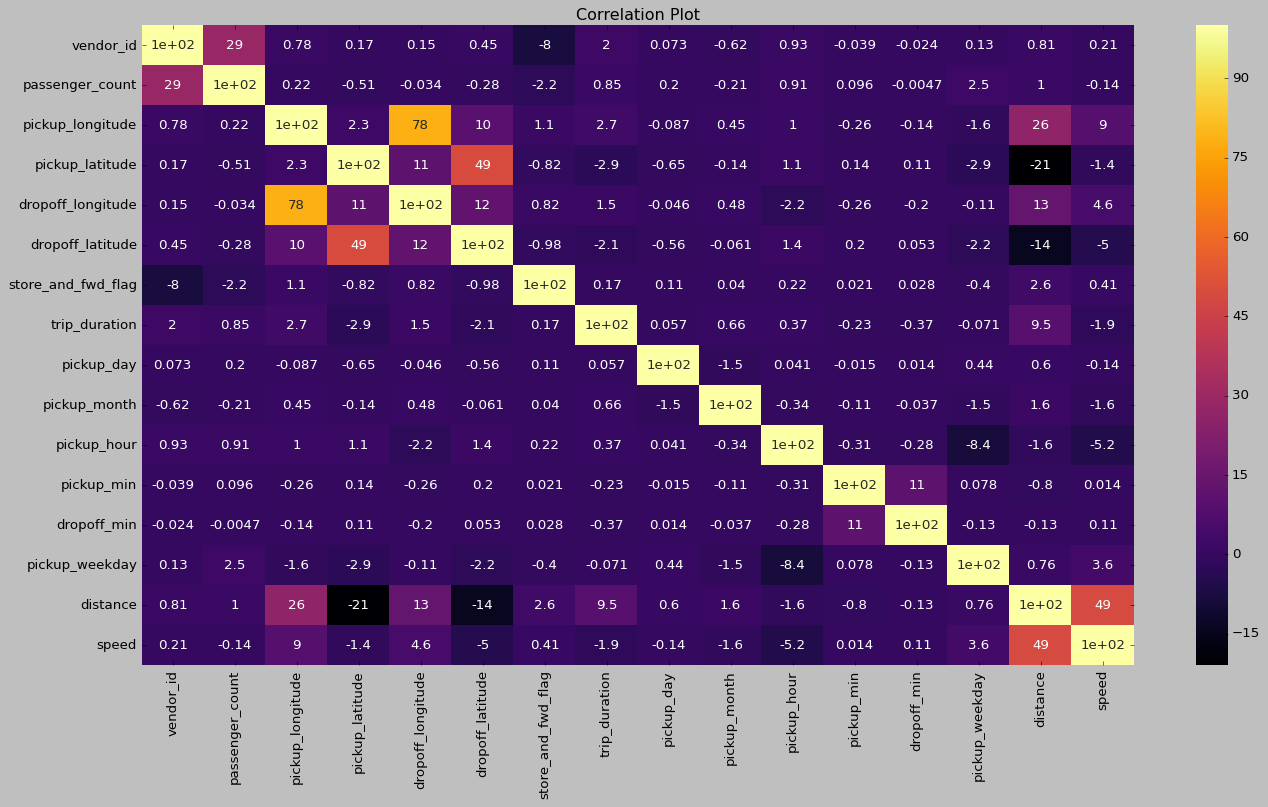

In [67]:
# Correlation Heatmap visualization code
#Plotting Pearson Correlation heatmap

plt.figure(figsize=(20,10))
sns.heatmap(Taxi_Time_df.corr()*100, annot=True, cmap='inferno')
plt.title('Correlation Plot')

## ***6. Feature Engineering & Data Pre-processing***

* After looking at the dataset from different perspectives. Let's prepare our dataset before training our model. Since our dataset do not contain very large number of dimensions. We will first try to use feature selection instead of the feature extraction technique.

In [68]:
#Encode your categorical columns
Taxi_Time_df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_day', 'pickup_month', 'pickup_date',
       'pickup_hour', 'pickup_min', 'dropoff_min', 'pickup_weekday',
       'distance', 'speed'],
      dtype='object')

In [69]:
#show the all columns 
Taxi_Time_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,pickup_month,pickup_date,pickup_hour,pickup_min,dropoff_min,pickup_weekday,distance,speed
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.98,40.77,-73.96,40.77,0,455,14,3,2016-03-14,17,24,32,0,1.50,11.86
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.98,40.74,-74.00,40.73,0,663,12,6,2016-06-12,0,43,54,6,1.81,9.80
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.98,40.76,-74.01,40.71,0,2124,19,1,2016-01-19,11,35,10,1,6.39,10.82
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.01,40.72,-74.01,40.71,0,429,6,4,2016-04-06,19,32,39,2,1.49,12.47
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.97,40.79,-73.97,40.78,0,435,26,3,2016-03-26,13,30,38,5,1.19,9.84


In [70]:
# #dropping unwanted columns
Taxi_Time_df = Taxi_Time_df.drop(['id','pickup_datetime','pickup_date','dropoff_datetime'], axis=1)


##**Normalization**

In [71]:
#Predictors and Target Variable

X = Taxi_Time_df.drop(['trip_duration'], axis=1)
y = np.log(Taxi_Time_df['trip_duration'])

In [72]:
X.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_day,pickup_month,pickup_hour,pickup_min,dropoff_min,pickup_weekday,distance,speed
0,2,1,-73.98,40.77,-73.96,40.77,0,14,3,17,24,32,0,1.50,11.86
1,1,1,-73.98,40.74,-74.00,40.73,0,12,6,0,43,54,6,1.81,9.80
2,2,1,-73.98,40.76,-74.01,40.71,0,19,1,11,35,10,1,6.39,10.82
3,2,1,-74.01,40.72,-74.01,40.71,0,6,4,19,32,39,2,1.49,12.47
4,2,1,-73.97,40.79,-73.97,40.78,0,26,3,13,30,38,5,1.19,9.84


In [73]:
# Normalising Predictors and creating new dataframe
from sklearn.preprocessing import StandardScaler

cols = X.columns

ss = StandardScaler()

new_df = ss.fit_transform(X)
new_df = pd.DataFrame(new_df, columns=cols)
new_df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_day,pickup_month,pickup_hour,pickup_min,dropoff_min,pickup_weekday,distance,speed
0,0.93,-0.51,-0.12,0.52,0.12,0.38,-0.07,-0.17,-0.31,0.53,-0.32,0.14,-1.56,-0.45,-0.17
1,-1.07,-0.51,-0.10,-0.38,-0.37,-0.58,-0.07,-0.40,1.48,-2.13,0.77,1.40,1.51,-0.38,-0.31
2,0.93,-0.51,-0.08,0.40,-0.45,-1.16,-0.07,0.40,-1.50,-0.41,0.31,-1.13,-1.05,0.69,-0.24
3,0.93,-0.51,-0.52,-0.94,-0.55,-1.26,-0.07,-1.09,0.29,0.84,0.14,0.54,-0.54,-0.46,-0.13
4,0.93,-0.51,0.01,1.29,0.01,0.86,-0.07,1.21,-0.31,-0.09,0.02,0.48,1.00,-0.52,-0.31



Normalizing the Dataset using Standard Scaling Technique.

Now, Why Standard Scaling ? Why not MinMax or Normalizer ?

* It is because MinMax adjusts the value between 0’s and 1’s , which tend to work better for optimization techniques like Gradient descent and machine learning algorithms like KNN.

* While, Normalizer uses distance measurement like Euclidean or Manhattan, so Normalizer tend to work better with KNN.

In [74]:
#creating new dataframe
X = new_df
X

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_day,pickup_month,pickup_hour,pickup_min,dropoff_min,pickup_weekday,distance,speed
0,0.93,-0.51,-0.12,0.52,0.12,0.38,-0.07,-0.17,-0.31,0.53,-0.32,0.14,-1.56,-0.45,-0.17
1,-1.07,-0.51,-0.10,-0.38,-0.37,-0.58,-0.07,-0.40,1.48,-2.13,0.77,1.40,1.51,-0.38,-0.31
2,0.93,-0.51,-0.08,0.40,-0.45,-1.16,-0.07,0.40,-1.50,-0.41,0.31,-1.13,-1.05,0.69,-0.24
3,0.93,-0.51,-0.52,-0.94,-0.55,-1.26,-0.07,-1.09,0.29,0.84,0.14,0.54,-0.54,-0.46,-0.13
4,0.93,-0.51,0.01,1.29,0.01,0.86,-0.07,1.21,-0.31,-0.09,0.02,0.48,1.00,-0.52,-0.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,0.93,1.78,-0.12,-0.16,-0.30,-0.32,-0.07,-0.86,0.29,-0.09,0.08,0.82,0.49,-0.52,-0.58
1458640,-1.07,-0.51,-0.39,-0.11,0.05,1.25,-0.07,-0.63,-1.50,-1.03,0.31,0.94,1.51,0.61,1.26
1458641,0.93,-0.51,0.20,0.54,-0.44,-1.24,-0.07,0.75,0.29,-1.19,1.58,-1.13,0.49,1.02,1.50
1458642,-1.07,-0.51,-0.12,-0.06,-0.02,0.15,-0.07,-1.21,-1.50,0.22,1.52,-1.59,-1.05,-0.55,-0.26


# ***7. ML Model Implementation***

### **Why Linear Regression , Decision Tree and Random Forest ?**

**Linear Regression**

* Simple to explain.
* Model training and prediction are fast.
* No tuning is required except regularization.

### **Decision Tree:**

* Decision trees are very intuitive and easy to explain.
* They follow the same pattern of thinking that humans use when making decisions.
* Decision trees are a common-sense technique to find the best solutions to problems with uncertainty.

### **Random Forest:**

* It is one of the most accurate learning algorithms available.
* Random Forest consisits of multiple Decision Tress - Results from multiple trees are then merged to give best possible final outcome.
* Random forests overcome several problems with decision trees like Reduction in overfitting.

**So, I want to approach from base model built using basic Linear Regression and then bring in more Sophisticated Algorithms - Decision Tree & Random Forest. It will give us good idea how Linear Regression performs against Decision Tree Regressor and Random Forest Regressor.**

* RMSLE as a evaluation Metrics , We can also hyper tune our Parameters to minimize the loss (RMSLE). We will also calculate Null RMSLE , which we can set as a benchmark for our Model's RMSLE.

In [75]:
#importing train test split & some important metrics

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_log_error , mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1021050, 15), (437594, 15), (1021050,), (437594,))

### ML Model - 1

## **Linear regression**

In [76]:
X = new_df
y = np.log(Taxi_Time_df['trip_duration']).values

In [77]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [78]:
#implenting linear regression

est_lr = LinearRegression()
est_lr.fit(X_train, y_train)
lr_pred = est_lr.predict(X_test)
lr_pred

array([6.23993517, 6.73331815, 6.24839241, ..., 6.37200223, 6.66326437,
       6.5160298 ])

In [79]:
#Intercept & Coef
est_lr.intercept_, est_lr.coef_

(6.46429596017842,
 array([ 0.01015263,  0.00791679, -0.08155229,  0.0152538 ,  0.05887397,
        -0.03303331, -0.00158058,  0.00468812,  0.02336535,  0.02788337,
        -0.0031698 , -0.00103326, -0.01581452,  0.60561919, -0.27659868]))

In [80]:

#Examining metrics

print ("Training Score : " , est_lr.score(X_train, y_train))

print ("Validation Score : ", est_lr.score(X_test, y_test))

print ("Cross Validation Score : " , cross_val_score(est_lr, X_train, y_train, cv=5).mean())

print ("R2_Score : ", r2_score(lr_pred, y_test))

#print ("RMSLE : ", np.sqrt(mean_squared_log_error(lr_pred, y_test)))

Training Score :  0.4398236536535498
Validation Score :  0.47747898728559846
Cross Validation Score :  0.34536440918203865
R2_Score :  -0.28641795926346547


Text(0.5, 1.0, 'Test VS Prediction')

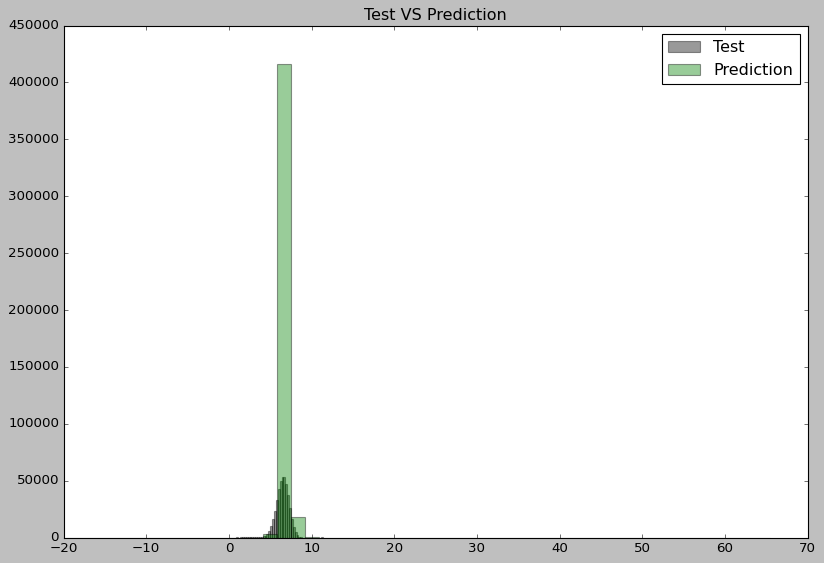

In [81]:
#prediction vs validation data

plt.figure(figsize=(12,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="black", label="Test")

plt.subplot(1,1,1)
sns.distplot(lr_pred, kde=False, color="g", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

* From the above Viz. we can clearly identify that the Linear Regression isn't performing good. The Actual Data (in Grey) and Predicted values (in Green) are so much differing. We can conclude that Linear Regression doesn't seem like a right choice for Trip duration prediction.

## **Null RMSLE**

* Null RMSLE is the RMSLE that could be achieved by predicting the mean response value. It is a benchmark against which you may want to measure your regression model.

In [82]:
#null rmsle implementation
from sklearn.metrics import mean_squared_log_error
y_null = np.zeros_like(y_test, dtype=float)
y_null.fill(y_test.mean())
print ("Null RMSLE : ", np.sqrt(mean_squared_log_error(y_test, y_null)))

Null RMSLE :  0.11464018891653321


### ML Model - 2

## **Decision Tree**

* Let us apply Decision Tree on our data and see what prediction it does.

In [83]:
#decision tree implementation
from sklearn.tree import DecisionTreeRegressor
est_dt = DecisionTreeRegressor(criterion="mse", max_depth=10)
est_dt.fit(X_train, y_train)
dt_pred = est_dt.predict(X_test)
dt_pred

array([6.47418433, 7.58509926, 6.21304216, ..., 7.06029736, 7.57652488,
       6.53146498])

In [84]:
#examining metrics

print ("Training Score : " , est_dt.score(X_train, y_train))

print ("Validation Score : ", est_dt.score(X_test, y_test))

print ("Cross Validation Score : " , cross_val_score(est_dt, X_train, y_train, cv=5).mean())

print ("R2_Score : ", r2_score(dt_pred, y_test))

print ("RMSLE : ", np.sqrt(mean_squared_log_error(dt_pred, y_test)))

Training Score :  0.976355026567126
Validation Score :  0.9755195815318771
Cross Validation Score :  0.9752449320631834
R2_Score :  0.9749337846772528
RMSLE :  0.02417724444802441


Text(0.5, 1.0, 'Test VS Prediction')

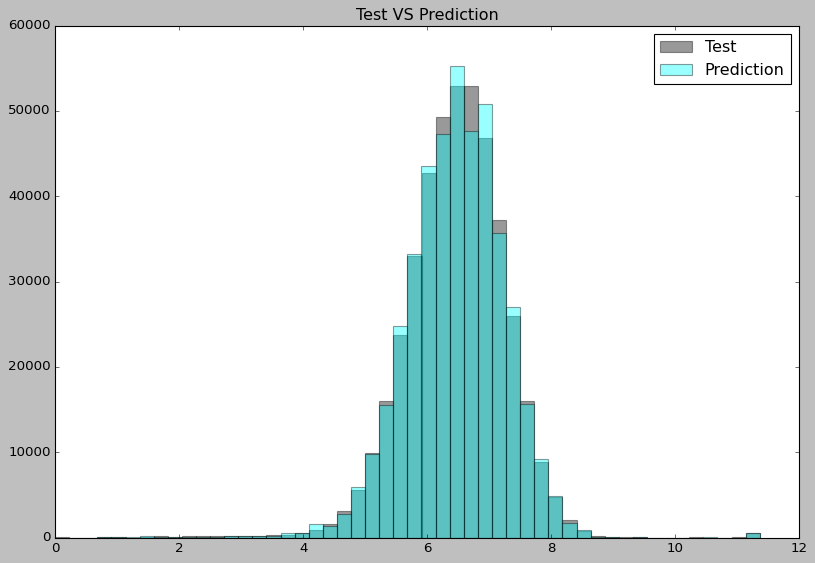

In [85]:
#prediction vs reality check

plt.figure(figsize=(12,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="black", label="Test")

plt.subplot(1,1,1)
sns.distplot(dt_pred, kde=False, color="cyan", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

* From the above Viz. we can clearly identify that the Decision Tree Algorithm is performing good. The Actual Data (in Black) and Predicted values (in Cyan) are as close as possible. We can conclude that Decision Tree could be a good choice for Trip duration prediction.

### ML Model - 3

##**Random Forest**

* Now, Let us also try Random Forest on our Data and see what do we get.

In [86]:
#implementation of forest algorithm

from sklearn.ensemble import RandomForestRegressor

est_rf = RandomForestRegressor(criterion="mse", n_estimators=5, max_depth=10)
est_rf.fit(X_train, y_train)
rf_pred = est_rf.predict(X_test)
rf_pred

array([6.49767933, 7.53477033, 6.20132504, ..., 7.07402581, 7.61693554,
       6.58346348])

In [87]:
#examining metrics

print ("Training Score : " , est_rf.score(X_train, y_train))

print ("Validation Score : ", est_rf.score(X_test, y_test))

print ("Cross Validation Score : " , cross_val_score(est_rf, X_train, y_train, cv=5).mean())

print ("R2_Score : ", r2_score(rf_pred, y_test))

print ("RMSLE : ", np.sqrt(mean_squared_log_error(rf_pred, y_test)))

Training Score :  0.9792416439608619
Validation Score :  0.9786771147204611
Cross Validation Score :  0.9790296210221439
R2_Score :  0.9780863227056769
RMSLE :  0.02311175601665904


Text(0.5, 1.0, 'Test VS Prediction')

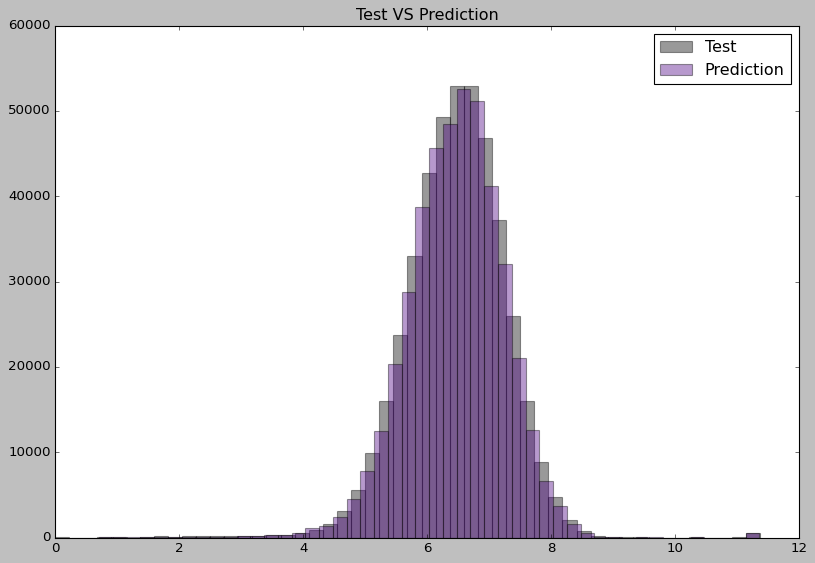

In [88]:
#prediction vs reality check

plt.figure(figsize=(12,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="black", label="Test")

plt.subplot(1,1,1)
sns.distplot(rf_pred, kde=False, color="indigo", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

* From the above Viz. we can clearly identify that the Random Forest Algorithm is also performing good. The Actual Data (in Black) and Predicted values (in Indigo) are as close as possible. We can conclude that Random Forest could be a good choice for Trip duration prediction.

Similarly, we can Hyper tune Random Forest to get the most out of it.


##R2 Scores Evaluation

* R2 Score or R-Squared is the proportion of the variance in the dependent variable that is predictable from the independent variable(s).

* Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

Text(0.5, 1.0, 'R2 Scores')

<Figure size 640x560 with 0 Axes>

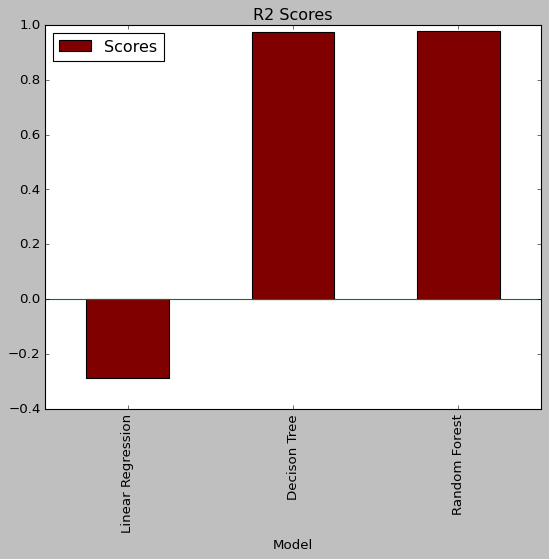

In [89]:
#r2 score plot for all 3 models

plt.figure(figsize=(8,7))
r2 = pd.DataFrame({'Scores':np.array([r2_score(lr_pred, y_test), r2_score(dt_pred, y_test), r2_score(rf_pred, y_test)]), 'Model':np.array(['Linear Regression', 'Decison Tree', 'Random Forest'])})
r2.set_index('Model').plot(kind="bar", color="maroon")
plt.axhline(y=0, color='g')
plt.title("R2 Scores")

* Although , our Evaluation Metric isn't R2 Score but I'm just plotting them to check the Good Fit.

* We're getting good fit score for Decision Tree and Random Forest , i.e, close to 1.0

##RMSLE Evaluation

* RMSLE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.
* With RMSLE we explicitly know how much our predictions deviate.
* Lower values of RMSLE indicate better fit with lesser LOSS.

Text(0.5, 1.0, 'RMSLE - Lesser is Better')

<Figure size 640x560 with 0 Axes>

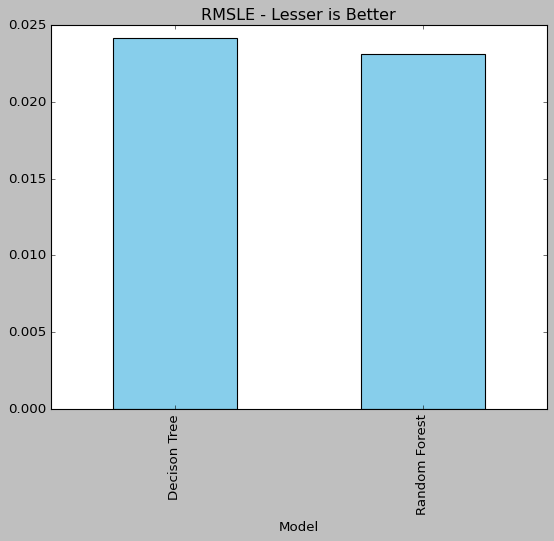

In [90]:
#RMSLE plot

plt.figure(figsize=(8,7))
r2 = pd.DataFrame({'RMSLE':np.array([np.sqrt(mean_squared_log_error(dt_pred, y_test)), np.sqrt(mean_squared_log_error(rf_pred, y_test))]), 'Model':np.array(['Decison Tree', 'Random Forest'])})
r2.set_index('Model').plot(kind="bar", color="skyblue", legend=False)
plt.title("RMSLE - Lesser is Better")

* Remember our NULL RMSLE : 0.1146 as a benchmark to beat.

* We can observe from above Viz. that our Decision Tree model and Random Forest model are good performers. As, Random Forest is providing us reduced RMSLE, we can say that it's a model to Opt for.

##**What's better - Decision Tree or Random Forest ?**


* One problem that might occur with Decision Tree is that it can overfit.

* Difference is - A random forest is a collection of decision trees.

* A decision tree model considers all the features which makes it memorize everything, it gets overfitted on training data which couldn't predict well on unseen data.

* A random forest chooses few number of rows at random and interprets results from all the Tress and combines it to get more accurate and stable final result.

##**Insights:**


* Observed which taxi service provider is most Frequently used by New Yorkers.

* Found out few trips which were of duration 528 Hours to 972 Hours, possibly Outliers.

* Passenger count Analysis showed us that there were few trips with Zero Passengers.

* Monthly trip analysis gives us a insight of Month – March and April marking the highest number of Trips while January marking lowest, possibly due to Snowfall.

##**Recommended Approach:**

* Apply Standard Scaling on the Dataset to Normalize the values.

<!-- * Further, Apply PCA to reduce dimensions, as you’ll extract features from our primary DateTime Feature. Those additional features might lead our model to 
suffer from “Curse of dimensionality” and could drastically affect performance. -->

<!-- * Pass the PCA Transformed data in our ML Regression Algorithms and Evaluate results. -->

## **Future Work (Optional)**

* Further, one can improve the model's performance using Hyper-Parameter Tuning.

* Other ML Algorithms can be Tried.

* One can take ANN approach.

* Also use PCA(Principle Component Analysis) technique.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**


In this project we covered various aspects of the Machine learning development cycle. We observed that the data exploration and variable analysis is a very important aspect of the whole cycle and should be done for thorough understanding of the data. We also cleaned the data while exploring as there were some outliers which should be treated before feature engineering. Further we did feature engineering to filter and gather only the optimal features which are more significant and covered most of the variance in the dataset. Then finally we trained the models on the optimum featureset to get the results.

* The most of the trips was taken by single passenger.

* There are 2 vendors seems to have almost equal market share. But Vendor   number 2 is evidently more famous among the population.

* The most of the rides are completed between 1-10 Kms with some of the rides with distances between 10-30 kms.

* The most of the trips took 0 - 30 mins to complete i.e. approx 1800 secs.

* The most of the trips were done at a speed range of 10-20 km/H.

* In store and forward flag indicate 99.45% trip record was in a vehicle memory before the vendor because vehicle did not connected to the server and 0.55% not stored forward trips.

* Taxi pickups which starts increasing from 6AM in the morning and then declines from late evening i.e. around 8 PM.

* Average trip duration is lowest at 6 AM when there is minimal traffic on the roads.

* Average trip duration is generally highest around 3 PM during the busy streets.

* Distance per month varying mostly around 3.5 km/h with 5th month being the highest in the average distance and 2nd month being the lowest.

* We use 3 algorithm for machine learning model training but Linear Regression not performing good as compare to Decision Tree and Random Forest algorithm.

* Decision Tree model and Random Forest model are good performers.



### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***